In [ ]:
!pip install pycaret

In [ ]:
pip install --upgrade scikit-learn==0.23.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\libra\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#import data and preprocess
import pandas as pd
import re
import string
from string import punctuation
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # atau 'Indonesian'

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#modelling
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
#Read Text

dep = ['cuttingquote.xlsx', 'depressed1278.xlsx', 'depressingmsgs.xlsx', 'suicidalconcept.xlsx']
nondep = 'nondepressiontweet2.xlsx'

def read_dep_files(files):
  for index, item in enumerate(files):
     if index == 1:
       dfs1 = pd.read_excel(item, usecols=[2])
     else:
       dfs2 = [pd.read_excel(item, usecols=[2]) for index, item in enumerate(files) if index != 1]
  df = pd.concat(dfs2, ignore_index=True)
  df = pd.concat([df, dfs1], ignore_index=True)
  df.rename(columns={'text':'tweet'}, inplace=True)
  df['label'] = 1
  return df

def read_nondep_files(files):
    text = pd.read_excel(files)
    return text

In [22]:
df_depressed = read_dep_files(dep)
df_depressed

,tweet,label
0,"Hey, how is everyone?",1
1,Just another scenario in my head,1
2,Honestly I’m just drifting,1
3,I’m just alone,1
4,Pain is all I know,1
...,...,...
1669,Have you ever laid on your bed at night and cr...,1
1670,"The fault, the blame, the pain's still there\n...",1
1671,Stop asking me to trust you when I’m still cou...,1
1672,I never know how to handle sadness.\nCrying ma...,1


In [23]:
df_nondepressed = read_nondep_files(nondep)
df_nondepressed

,tweet,label
0,Detroit Lions end 15-game winless run and pay ...,0
1,The January 6 committee is facing a new challe...,0
2,The governing body of tennis -- the Internatio...,0
3,https://t.co/bmtdxpWtto CEO Vishal Garg announ...,0
4,A growing number of countries across the world...,0
...,...,...
1356,Our parents will always listen to our stories....,0
1357,Exercise your muscles. Laugh at funny times. 😄,0
1358,Lovely is the word best describes you.,0
1359,Nothing beats a good sleep.,0


In [24]:
df = pd.concat([df_depressed, df_nondepressed], ignore_index=True)
df['length'] = df.tweet.apply(len)
df.describe()

,label,length
count,3035.000000,3035.000000
mean,0.551565,82.236903
std,0.497416,43.349892
min,0.000000,3.000000
25%,0.000000,43.000000
50%,1.000000,72.000000
75%,1.000000,137.000000
max,1.000000,144.000000


In [7]:
df.shape

(3035, 3)

In [8]:
df

,tweet,label,length
0,"Hey, how is everyone?",1,21
1,Just another scenario in my head,1,32
2,Honestly I’m just drifting,1,26
3,I’m just alone,1,14
4,Pain is all I know,1,18
...,...,...,...
3030,Our parents will always listen to our stories....,0,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46
3032,Lovely is the word best describes you.,0,38
3033,Nothing beats a good sleep.,0,27


C:\Users\libra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


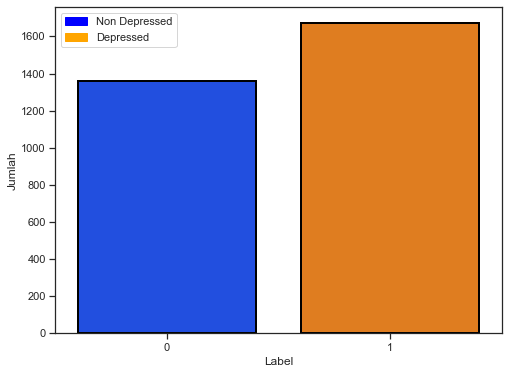

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(df.label, palette='bright', edgecolor= 'black', linewidth=2)
sns.set(style='ticks')
plt.xlabel("Label")
plt.ylabel("Jumlah")
colors = {'Non Depressed':'Blue', 'Depressed':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

### Data Cleansing

In [ ]:
! pip install tweet-preprocessor 

import preprocessor as p

In [ ]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

In [26]:
# Bikin kolom baru berisi text_clean

df['tweet_clean'] = df['tweet']
df.tail(10)

,tweet,label,length,tweet_clean
3025,You being you is the best you. #happy,0,37,You being you is the best you. #happy
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new things.\nNew things = challenges.\nC...
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile. It may mean the world to someone. ...
3028,Making fun of people is very different from ha...,0,80,Making fun of people is very different from ha...
3029,Live free. 😝,0,12,Live free. 😝
3030,Our parents will always listen to our stories....,0,67,Our parents will always listen to our stories....
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise your muscles. Laugh at funny times. 😄
3032,Lovely is the word best describes you.,0,38,Lovely is the word best describes you.
3033,Nothing beats a good sleep.,0,27,Nothing beats a good sleep.
3034,Started a new life leaving all the worries beh...,0,50,Started a new life leaving all the worries beh...


In [27]:
#Buat kolom length untuk length text_clean

df['tweet_clean_length'] = df['tweet_clean'].apply(len)
df.head(10)

,tweet,label,length,tweet_clean,tweet_clean_length
0,"Hey, how is everyone?",1,21,"Hey, how is everyone?",21
1,Just another scenario in my head,1,32,Just another scenario in my head,32
2,Honestly I’m just drifting,1,26,Honestly I’m just drifting,26
3,I’m just alone,1,14,I’m just alone,14
4,Pain is all I know,1,18,Pain is all I know,18
5,I just want to disappear,1,24,I just want to disappear,24
6,My heart is shattered,1,21,My heart is shattered,21
7,I’m not good at being alone,1,27,I’m not good at being alone,27
8,If I could stop missing you I would,1,35,If I could stop missing you I would,35
9,Sad,1,3,Sad,3


#### Removing Stopwords

In [28]:
# Importing the libraries 
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\libra\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'s', 'm', 'hadn', 'too', 'me', 'had', 'is', 'other', 'over', "doesn't", 'isn', 'her', 'be', 'until', 'up', "shan't", 'such', 'then', 'themselves', 'of', 'because', 'yours', 'few', 'yourselves', 'its', "mustn't", "you'd", 'does', 'them', 'by', 'doesn', 'not', 'mightn', 'under', 'as', 'very', 'won', 'now', 'herself', 'here', 'and', 'been', 'our', 'do', 'mustn', 'did', 'she', 'after', 'will', 'further', 'd', 'weren', 'just', 'his', 'the', 'their', 'there', 'have', 'yourself', 'a', "you've", 'theirs', 'needn', 'ours', "hadn't", "wasn't", 'down', 'for', 'was', 'wouldn', "you'll", 'once', 'before', 'we', 'am', 'each', 'into', 'haven', 'itself', 'why', 'more', 't', "that'll", 'hers', 'on', 'at', 'are', 'ain', "weren't", "shouldn't", 'those', 'where', 'most', 'if', 'out', 'he', 'but', 'how', "won't", 'has', 'no', 'own', 'they', "wouldn't", 'during', 'some', 'this', 'who', 'couldn', 'these', 'y', 'both', 've', 'my', 'all', 'below', 'shouldn', "mightn't", 'it', 'what', "needn't", 'o', 'that', '

In [30]:
def removeSW(text):
    sw = " ".join([word for word in text.split() if word not in stop_words])
    return sw

df['tweet_clean'] = df['tweet_clean'].apply(removeSW)
df.tail(10)

,tweet,label,length,tweet_clean,tweet_clean_length
3025,You being you is the best you. #happy,0,37,You best you. #happy,37
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new things. New things = challenges. Cha...,67
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile. It may mean world someone. #ALDUBT...,68
3028,Making fun of people is very different from ha...,0,80,Making fun people different fun people. Stay c...,80
3029,Live free. 😝,0,12,Live free. 😝,12
3030,Our parents will always listen to our stories....,0,67,Our parents always listen stories. Start shari...,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise muscles. Laugh funny times. 😄,46
3032,Lovely is the word best describes you.,0,38,Lovely word best describes you.,38
3033,Nothing beats a good sleep.,0,27,Nothing beats good sleep.,27
3034,Started a new life leaving all the worries beh...,0,50,Started new life leaving worries behind.,50


#### Removing Unicode

In [31]:
def removeUnicode(text):
    text_encode = text.encode(encoding="ascii", errors="ignore")
    text_decode = text_encode.decode()
    uni = " ".join([word for word in text_decode.split()])
    return uni

df['tweet_clean'] = df['tweet_clean'].apply(removeUnicode)
df.tail(10)

,tweet,label,length,tweet_clean,tweet_clean_length
3025,You being you is the best you. #happy,0,37,You best you. #happy,37
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new things. New things = challenges. Cha...,67
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile. It may mean world someone. #ALDUBT...,68
3028,Making fun of people is very different from ha...,0,80,Making fun people different fun people. Stay c...,80
3029,Live free. 😝,0,12,Live free.,12
3030,Our parents will always listen to our stories....,0,67,Our parents always listen stories. Start shari...,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise muscles. Laugh funny times.,46
3032,Lovely is the word best describes you.,0,38,Lovely word best describes you.,38
3033,Nothing beats a good sleep.,0,27,Nothing beats good sleep.,27
3034,Started a new life leaving all the worries beh...,0,50,Started new life leaving worries behind.,50


#### Removing Link

In [32]:
# Remove link
import re

def deLink(text):
    regex_link = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", text)
    return regex_link

df['tweet_clean'] = df['tweet_clean'].apply(deLink)
df.tail(10)

,tweet,label,length,tweet_clean,tweet_clean_length
3025,You being you is the best you. #happy,0,37,You best you. #happy,37
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new things. New things = challenges. Cha...,67
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile. It may mean world someone. #ALDUBT...,68
3028,Making fun of people is very different from ha...,0,80,Making fun people different fun people. Stay c...,80
3029,Live free. 😝,0,12,Live free.,12
3030,Our parents will always listen to our stories....,0,67,Our parents always listen stories. Start shari...,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise muscles. Laugh funny times.,46
3032,Lovely is the word best describes you.,0,38,Lovely word best describes you.,38
3033,Nothing beats a good sleep.,0,27,Nothing beats good sleep.,27
3034,Started a new life leaving all the worries beh...,0,50,Started new life leaving worries behind.,50


#### Removing Space

In [33]:
#ganti '\n' dengan spasi

df['tweet_clean'] = [x.replace('\n', ' ') for x in df['tweet_clean']]
df.tail(10)

,tweet,label,length,tweet_clean,tweet_clean_length
3025,You being you is the best you. #happy,0,37,You best you. #happy,37
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new things. New things = challenges. Cha...,67
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile. It may mean world someone. #ALDUBT...,68
3028,Making fun of people is very different from ha...,0,80,Making fun people different fun people. Stay c...,80
3029,Live free. 😝,0,12,Live free.,12
3030,Our parents will always listen to our stories....,0,67,Our parents always listen stories. Start shari...,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise muscles. Laugh funny times.,46
3032,Lovely is the word best describes you.,0,38,Lovely word best describes you.,38
3033,Nothing beats a good sleep.,0,27,Nothing beats good sleep.,27
3034,Started a new life leaving all the worries beh...,0,50,Started new life leaving worries behind.,50


#### Removing Punctuations

In [34]:
#Buang Tanda Baca

import string
string.punctuation

def message_cleaning(message):
    # test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''
    for char in message:
        if char not in string.punctuation:
            test_punc_removed += char
        else:
            test_punc_removed += " "
            
    test_punc_removed_join = ''.join(test_punc_removed)
    test_punc_removed_join_clean = [word for word in test_punc_removed_join.split()]
    test_punc_removed_join_clean = " ".join(test_punc_removed_join_clean)
    return test_punc_removed_join_clean

df['tweet_clean'] = df['tweet_clean'].apply(message_cleaning)
df.tail(10)

,tweet,label,length,tweet_clean,tweet_clean_length
3025,You being you is the best you. #happy,0,37,You best you happy,37
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new things New things challenges Challen...,67
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile It may mean world someone ALDUBTheL...,68
3028,Making fun of people is very different from ha...,0,80,Making fun people different fun people Stay cl...,80
3029,Live free. 😝,0,12,Live free,12
3030,Our parents will always listen to our stories....,0,67,Our parents always listen stories Start sharin...,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise muscles Laugh funny times,46
3032,Lovely is the word best describes you.,0,38,Lovely word best describes you,38
3033,Nothing beats a good sleep.,0,27,Nothing beats good sleep,27
3034,Started a new life leaving all the worries beh...,0,50,Started new life leaving worries behind,50


#### Using Textblob for Lemmanization

In [35]:
# Text Blob
from textblob import TextBlob, Word
def textblb(text):
    s = TextBlob(text)
    lsblb = " ".join([w.lemmatize() for w in s.words])
    return lsblb

df['tweet_clean'] = df['tweet_clean'].apply(textblb)
df.tail(10)

,tweet,label,length,tweet_clean,tweet_clean_length
3025,You being you is the best you. #happy,0,37,You best you happy,37
3026,Learn new things.\nNew things = challenges.\nC...,0,67,Learn new thing New thing challenge Challenges...,67
3027,Just smile. It may mean the world to someone. ...,0,68,Just smile It may mean world someone ALDUBTheL...,68
3028,Making fun of people is very different from ha...,0,80,Making fun people different fun people Stay cl...,80
3029,Live free. 😝,0,12,Live free,12
3030,Our parents will always listen to our stories....,0,67,Our parent always listen story Start sharing y...,67
3031,Exercise your muscles. Laugh at funny times. 😄,0,46,Exercise muscle Laugh funny time,46
3032,Lovely is the word best describes you.,0,38,Lovely word best describes you,38
3033,Nothing beats a good sleep.,0,27,Nothing beat good sleep,27
3034,Started a new life leaving all the worries beh...,0,50,Started new life leaving worry behind,50


### Remove Specific Word

In [20]:
word_to_remove = set(['m', '9WWOS', 'S', 's', 'Don', 'cq', 'ga', 'rc', 't', 've', 'Im', 'RT',
                     'really', 'feel', 'Ive', 'everything', 'know', 'everyone', 
                      'always', 'make', 'understand', 'thing', 'life', 'want', 'one', 'nothing', 'feeling', 'much', 'day', 
                      'time', 'keep', 'Ashe', 'go', 'remember', 'right', 'take', 'first', 'let', 'Cricket', 
                     'wanted', 'dont', 'anymore', 'thinking', 'something', 'actually', 'lot', 'im', 
                      'one', 'simple', 'stay', 'always', 'may', 'give', 'england', 'without','need', 'le', 'sit', 're', 
                      'people', 'someone', 'never', 'even', 'think', 'happy', 'anyone', 'smile', 'good', 'love', 'care'])
print(word_to_remove)

def removewords(text):
    wo = " ".join([word for word in text.split() if word not in word_to_remove])
    return wo

df['tweet_clean'] = df['tweet_clean'].apply(removewords)

{'s', 'm', 'simple', 'thinking', 'lot', 'smile', 'something', 'england', 'wanted', 'good', 'everything', 'never', 'life', 'day', 'thing', 'Cricket', 'give', 'Im', 'someone', 'love', 'nothing', 'stay', 'ga', 'think', 'want', 'actually', 'much', 'anymore', 'RT', 've', 'Ashe', 'remember', 'one', 'right', 'understand', 'always', 'time', 'may', 'Don', 'cq', 'im', 're', 'people', 'S', '9WWOS', 'really', 'dont', 'even', 'sit', 'keep', 'care', 't', 'rc', 'without', 'le', 'Ive', 'happy', 'feel', 'know', 'take', 'everyone', 'first', 'need', 'anyone', 'make', 'feeling', 'let', 'go'}


In [45]:
word_to_remove = set(['m', '9WWOS', 'S', 's', 'Don', 'cq', 'ga', 'rc', 't', 've', 'Im', 'RT',
                     'really', 'feel', 'Ive', 'everything', 'know', 'everyone', 
                      'always', 'make', 'understand', 'thing', 'want', 'one', 'nothing', 'much', 'day', 
                      'time', 'keep', 'Ashe', 'go', 'remember', 'right', 'take', 'first', 'let', 'Cricket', 
                     'wanted', 'dont', 'anymore', 'thinking', 'something', 'actually', 'lot', 'im', 
                      'one', 'simple', 'stay', 'always', 'may', 'give', 'england', 'without','need', 'le', 'sit', 're', 
                      'never', 'even', 'person', 'come', 'Ashe', 'test', 'live', 'life', 'people', 'someone', 'change', 
                      'back', 'every', 'keep', 'matter', 'end', 'never', 'think', 'keep', 'find'])
print(word_to_remove)

def removewords(text):
    wo = " ".join([word for word in text.split() if word not in word_to_remove])
    return wo

df['tweet_clean'] = df['tweet_clean'].apply(removewords)

{'s', 'm', 'simple', 'thinking', 'lot', 'something', 'england', 'wanted', 'everything', 'never', 'life', 'day', 'person', 'thing', 'Cricket', 'test', 'give', 'Im', 'someone', 'nothing', 'stay', 'ga', 'think', 'want', 'actually', 'back', 'much', 'anymore', 'RT', 've', 'Ashe', 'remember', 'one', 'right', 'understand', 'always', 'time', 'may', 'Don', 'cq', 'im', 're', 'live', 'S', 'people', '9WWOS', 'really', 'dont', 'even', 'matter', 'sit', 'keep', 'end', 't', 'rc', 'without', 'le', 'every', 'Ive', 'feel', 'know', 'take', 'everyone', 'come', 'first', 'need', 'find', 'make', 'change', 'let', 'go'}


### Word Cloud

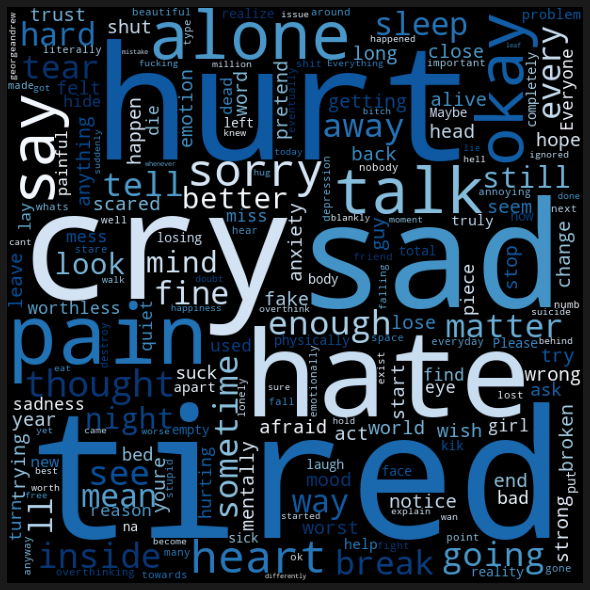

In [83]:
from wordcloud import WordCloud, STOPWORDS

#Depressive Words

depressive_words = ' '.join(list(df[df['label'] == 1]['tweet_clean']))
depressive_wc = WordCloud(width = 612,height = 612, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

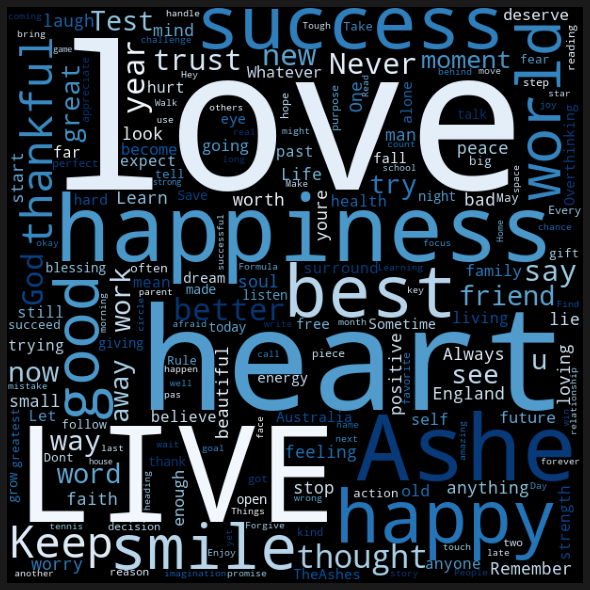

In [46]:
from wordcloud import WordCloud, STOPWORDS

#Non-Depressive Words

depressive_words = ' '.join(list(df[df['label'] == 0]['tweet_clean']))
depressive_wc = WordCloud(width = 612,height = 612, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()